# Cisco - Ariel University API Security Detection Challenge 2023

## Student ID: 207276775
GitHub project: https://github.com/RazElbaz/API_security_challenge

The site that helped me find algorithms:
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

### Imports and global settings

In [1]:
# Imports, settings and first dataset view
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

# Global setting here you choose the dataset number and classification type for the model
dataset_number = 3 # Options are [1, 2, 3, 4]
test_type = 'attack_type' # Options are ['label', 'attack_type']

# Read the json and read it to a pandas dataframe object, you can change these settings
with open(f'./dataset_{str(dataset_number)}_train.json') as file:
    raw_ds = json.load(file)
df = pd.json_normalize(raw_ds, max_level=2)

# Shoe the first five lines of the dataframe to see if everything was read accordingly 
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,request.Attack_Tag,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Content-Length,response.headers.Location,request.headers.Cookie,response.headers.Set-Cookie
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=yGkqVSrlAG5SQ_fZmLWaNcmRrpqyDTqyfly6jHH51...,"Wed, 14 Dec 2022 23:59:27 GMT",GET,http://127.0.0.1:5000/greet/%7B%7Bget_flashed_...,,RCE,200 OK,text/html; charset=utf-8,48,200,text/html; charset=utf-8,NaN,NaN,NaN,NaN
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,same-origin,?1,document,['ck=CBhNqYCEwU1hN4CAD575di_4AcXDmw9CJAmtkmnri...,"Thu, 15 Dec 2022 00:36:21 GMT",GET,http://127.0.0.1:5000/about/greet?id=8730419.2...,,NaN,200 OK,text/html; charset=utf-8,93,200,text/html; charset=utf-8,NaN,NaN,NaN,NaN
2,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=ZQg8nVqE2_D3CUsmSgDblTxzOkazD7RURCvUUcty_...,"Thu, 15 Dec 2022 00:47:40 GMT",GET,http://127.0.0.1:5000/static/download_txt/Inez...,,NaN,200 OK,application/json,88,200,"{""error"": ""File Inez.txtfilename=0MGnu5_DtpSPy...",NaN,NaN,NaN,NaN
3,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=3bV7UJGya8WbsvLb5oZMQfCX_kAxzzmCNHYnBZ6gd...,"Thu, 15 Dec 2022 00:45:52 GMT",GET,http://127.0.0.1:5000/categories/check/all?res...,,NaN,200 OK,application/json,871,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...",NaN,NaN,NaN,NaN
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,"gzip, deflate, br",*/*,keep-alive,de,none,websocket,?1,document,['ck=GYA_AaxVnjLo7_TMm5qDgaJwuKEWzzJ3SU3UlNLqY...,"Thu, 15 Dec 2022 00:48:06 GMT",GET,http://127.0.0.1:5000/orders/get/id/4581?id=62...,,NaN,404 NOT FOUND,application/json,31,404,"{""error"": ""Order ID not found""}",NaN,NaN,NaN,NaN


In [2]:
# print(df['request.headers.Accept-Encoding'].tolist())
print(df['request.headers.Accept-Encoding'].unique())

['gzip, deflate, br' 'gzip, deflate'
 'gzip, deflate, br${jndi:ldaprootsweb.ancestry.com/~nyoswego/towns/hannibal/hanhistsoc.html}'
 'gzip, deflate, br${jndi:ldapperfectpeople.net/article/557/4449764/chris-farley/net-worth-humor-found-in-site-that-fosters-demotivation-lawrence-journal-world.htm}'
 'gzip, deflate, br${jndi:ldapmanages-purchaseapps-serviceappie.com}'
 'gzip, deflate, br${jndi:ldapen.wikipedia.org/wiki/FA_Youth_Cup}'
 'gzip, deflate, br${jndi:ldaplinkedin.com/pub/dominic-gagn%C3%A9/27/aa/498}'
 'gzip, deflate, br${jndi:ldaphttp://www.thenewspaper.ca/the-editorial.1}'
 'gzip, deflate, br${jndi:ldapcrkn.ca/}'
 'gzip, deflate, br${jndi:ldaptheglobeandmail.com/news/politics/the-senator-the-port-authority-and-the-big-boss-in-quebec/article1995433/}'
 'gzip, deflate, br${jndi:ldapwc.rootsweb.ancestry.com/cgi-bin/igm.cgi?op=REG&db=lisamarlyn&id=I1077}'
 'gzip, deflate, br${jndi:ldaphttp://usbank-link-mupyndtfft---com.illmickelsonbeats.com/getStep.php?id=4a53634f333bbf31c708ee572

In [3]:
df.dtypes

request.headers.Host               object
request.headers.User-Agent         object
request.headers.Accept-Encoding    object
request.headers.Accept             object
request.headers.Connection         object
request.headers.Accept-Language    object
request.headers.Sec-Fetch-Site     object
request.headers.Sec-Fetch-Mode     object
request.headers.Sec-Fetch-User     object
request.headers.Sec-Fetch-Dest     object
request.headers.Set-Cookie         object
request.headers.Date               object
request.method                     object
request.url                        object
request.body                       object
request.Attack_Tag                 object
response.status                    object
response.headers.Content-Type      object
response.headers.Content-Length    object
response.status_code                int64
response.body                      object
request.headers.Content-Length     object
response.headers.Location          object
request.headers.Cookie            

In [4]:
# from user_agents import parse
# j=0
# for i in range(1000):
#     user_agent = parse(df['request.headers.User-Agent'][j])
#     print(j)
# #     us = user_agent.is_pc
#     print( str(user_agent))
#     j+=1

In [5]:
df['request.headers.Set-Cookie'].iloc[10]

"['ck=CO2bCCcDwMqZweLr1CnvcYOVNfJB_lj2705Rpuq_siHHFo19JEkYHf_J_9EIubdXiZppjKQXSbQFF4P88fn2cwCGHQ2JKZDBciznGQKHBYvIAr7tAdAqt3QF9aDFRfUupUjNfqOIfIlUVsJs63kYScWDuYabSYX3tld-xLZPQws; Domain=localhost:5000; Expires=Sat, 14 Jan 2023 00:40:25 GMT', 'uu=ZVRufqOuYB-RNcWyqsMhIfKzX937OmSVTp4PtHztYHgqGErC6njHArR2K6uSBALXdl4qdvIHyE6SZJn4Pjm7mlmV-_yiWL5vAUFABw0OR0MuuiayKMYCyFv2gSO1Y_hqrFrzNCKKgwNZBJYMooeBvnupJaTUPod7MAoZUcwp09g; Domain=localhost:5000; Expires=Fri, 30 Dec 2022 00:40:25 GMT', 'session=f4c056f0-a7ed-417d-9381-2559cb40754a; Expires=Thu, 15 Dec 2022 01:10:25 GMT']"

### Basic dataset label arrangements

In [6]:
# Fill the black attack tag lines with "Benign" string
df['request.Attack_Tag'] = df['request.Attack_Tag'].fillna('Benign')
df['attack_type'] = df['request.Attack_Tag']

# This function will be used in the lambda below to iterate over the label columns 
# You can use this snippet to run your own lambda on any data with the apply() method
def categorize(row):  
    if row['request.Attack_Tag'] == 'Benign':
        return 'Benign'
    return 'Malware'

df['label'] = df.apply(lambda row: categorize(row), axis=1)

# After finishing the arrangements we delete the irrelevant column
df.drop('request.Attack_Tag', axis=1, inplace=True)

df

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Content-Length,response.headers.Location,request.headers.Cookie,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=yGkqVSrlAG5SQ_fZmLWaNcmRrpqyDTqyfly6jHH51...,"Wed, 14 Dec 2022 23:59:27 GMT",GET,http://127.0.0.1:5000/greet/%7B%7Bget_flashed_...,,200 OK,text/html; charset=utf-8,48,200,text/html; charset=utf-8,NaN,NaN,NaN,NaN,RCE,Malware
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,same-origin,?1,document,['ck=CBhNqYCEwU1hN4CAD575di_4AcXDmw9CJAmtkmnri...,"Thu, 15 Dec 2022 00:36:21 GMT",GET,http://127.0.0.1:5000/about/greet?id=8730419.2...,,200 OK,text/html; charset=utf-8,93,200,text/html; charset=utf-8,NaN,NaN,NaN,NaN,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=ZQg8nVqE2_D3CUsmSgDblTxzOkazD7RURCvUUcty_...,"Thu, 15 Dec 2022 00:47:40 GMT",GET,http://127.0.0.1:5000/static/download_txt/Inez...,,200 OK,application/json,88,200,"{""error"": ""File Inez.txtfilename=0MGnu5_DtpSPy...",NaN,NaN,NaN,NaN,Benign,Benign
3,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=3bV7UJGya8WbsvLb5oZMQfCX_kAxzzmCNHYnBZ6gd...,"Thu, 15 Dec 2022 00:45:52 GMT",GET,http://127.0.0.1:5000/categories/check/all?res...,,200 OK,application/json,871,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...",NaN,NaN,NaN,NaN,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,"gzip, deflate, br",*/*,keep-alive,de,none,websocket,?1,document,['ck=GYA_AaxVnjLo7_TMm5qDgaJwuKEWzzJ3SU3UlNLqY...,"Thu, 15 Dec 2022 00:48:06 GMT",GET,http://127.0.0.1:5000/orders/get/id/4581?id=62...,,404 NOT FOUND,application/json,31,404,"{""error"": ""Order ID not found""}",NaN,NaN,NaN,NaN,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144495,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...,"gzip, deflate, br",*/*,keep-alive,de,none,websocket,?1,document,['ck=CUsow_eOa54yp9oNsd1BhZF2lKtgt-PGMG7iBnLba...,"Thu, 15 Dec 2022 00:49:47 GMT",GET,http://127.0.0.1:5000/?res_id=kc66M-9P2z2nOc6C...,,200 OK,text/html; charset=utf-8,34,200,text/html; charset=utf-8,NaN,NaN,NaN,NaN,Benign,Benign
144496,127.0.0.1:5000,python-requests/2.28.1,"gzip, deflate",*/*,keep-alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GET,http://127.0.0.1:5000/bookstore,,200 OK,application/json,41,200,"{""message"": ""Welcome to the Book Store!""}",NaN,NaN,NaN,NaN,Benign,Benign
144497,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; r...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=wo-zV78-fKpHPJjNrkXs_EyYZNCJ_VErr0hf4O8l1...,"Thu, 15 Dec 2022 00:47:04 GMT",GET,http://127.0.0.1:5000/greet/Manuel,,200 OK,text/html; charset=utf-8,22,200,text/html; charset=utf-8,NaN,NaN,NaN,NaN,Benign,Benign
144498,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,websocket,?1,document,['ck=2mYff-_R_5fjojY_G5JZQ1uiY-WO6gdfN09c9nH_R...,"Thu, 15 Dec 2022 00:42:00 GMT",GET,http://127.0.0.1:5000/orders/get/random/6,,200 OK,application/json,20,200,"[{}, {}, {}, {}, {}, {}]",NaN,NaN,NaN,NaN,Benign,

In [7]:
adult_names = df.loc[df['attack_type'] == "LOG4J" , "request.url"]

In [8]:
# print(adult_names.uniqe())
adult_names.tolist()

['http://127.0.0.1:5000/greet/Inez',
 'http://127.0.0.1:5000/about/random_page?id=1182946.6302660294&resource=B6627CGqFXYlJwNTOYAFRZAXmmdb_xMqVo9fs52kqb0',
 'http://127.0.0.1:5000/orders/get/country?country=Morocco',
 'http://127.0.0.1:5000/api/swagger.json?id=6813269.106963856&resource=gU0zIRWMkewYV8-lo2J3l6VO4SetIREmXed6EetOYmc&screen=1920x1080',
 'http://127.0.0.1:5000/states/get/region/north',
 'http://127.0.0.1:5000/orders/get/id/5033?id=9411914.976792265',
 'http://127.0.0.1:5000/?resource_id=6pbLCHMrD0u-nTXSW__lGE_529TClxr8gnlmenOicSs',
 'http://127.0.0.1:5000/orders/get/employee_id/3?id=6828594.241267416&resource=FjyT4ttf5f8EbxEW25E-9Pgb0b3llriP_rtlkuNtCLE',
 'http://127.0.0.1:5000/orders/check/exists?val=7508$id=4191938.788574398',
 'http://127.0.0.1:5000/api/swagger.json?res_id=gu0S3FKxKIwACDm4K0zWqr6safX89mP9AojBt6CEvTI',
 'http://127.0.0.1:5000/greet/Gina',
 'http://127.0.0.1:5000/forgot-password',
 'http://127.0.0.1:5000/orders/get/random/13',
 'http://127.0.0.1:5000/order

In [9]:
adult_names = df.loc[df['attack_type'] == "Benign" , "request.url"]

In [10]:
adult_names.tolist()

['http://127.0.0.1:5000/about/greet?id=8730419.269779723&resource_id=2wI0Z0uehihwDeer6dW4XYLVOJ3TFhyfCtBX8N02zvM&screen=3840x2160',
 'http://127.0.0.1:5000/static/download_txt/Inez.txtfilename%3D0MGnu5_DtpSPyXzrxytllTIWWSR3Y1fKP73MQFNFZIY',
 'http://127.0.0.1:5000/categories/check/all?resource=I5VeE2hcp0kx726mh6LmxWSLwnhwOGTYeMOB3-AUqV8&ssize=3840x2160',
 'http://127.0.0.1:5000/orders/get/id/4581?id=6201978.255995754',
 'http://127.0.0.1:5000/orders/get/random/7',
 'http://127.0.0.1:5000/orders/get/random/2',
 'http://127.0.0.1:5000/about/greet?id=2504858.393548126',
 'http://127.0.0.1:5000/states/get/region/north',
 'http://127.0.0.1:5000/categories/check/name/Meat/Poultry',
 'http://127.0.0.1:5000/orders/get/random/15',
 'http://127.0.0.1:5000/about/greet?res_id=TESAmZTd5Eh_8IKSZeX4TP3bjArh503ZjWqM0ov3Fxg&res=1440p',
 'http://127.0.0.1:5000/bookstore/books',
 'http://127.0.0.1:5000/forgot-password',
 'http://127.0.0.1:5000/states/Cook%20Islands?id=9023030.488211732&file_id=OKC-Qwy0N0

In [11]:
df['request.headers.User-Agent'].iloc[10]

'Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20100101 Firefox/31.0'

In [12]:
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in df.columns[df.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
    df[column] = df[column].fillna('None')
    
# If you want to detect columns that may have only some NaN values use this:
# df.loc[:, df.isna().any()].tolist()

df

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Content-Length,response.headers.Location,request.headers.Cookie,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=yGkqVSrlAG5SQ_fZmLWaNcmRrpqyDTqyfly6jHH51...,"Wed, 14 Dec 2022 23:59:27 GMT",GET,http://127.0.0.1:5000/greet/%7B%7Bget_flashed_...,,200 OK,text/html; charset=utf-8,48,200,text/html; charset=utf-8,None,None,None,None,RCE,Malware
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,same-origin,?1,document,['ck=CBhNqYCEwU1hN4CAD575di_4AcXDmw9CJAmtkmnri...,"Thu, 15 Dec 2022 00:36:21 GMT",GET,http://127.0.0.1:5000/about/greet?id=8730419.2...,,200 OK,text/html; charset=utf-8,93,200,text/html; charset=utf-8,None,None,None,None,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=ZQg8nVqE2_D3CUsmSgDblTxzOkazD7RURCvUUcty_...,"Thu, 15 Dec 2022 00:47:40 GMT",GET,http://127.0.0.1:5000/static/download_txt/Inez...,,200 OK,application/json,88,200,"{""error"": ""File Inez.txtfilename=0MGnu5_DtpSPy...",None,None,None,None,Benign,Benign
3,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=3bV7UJGya8WbsvLb5oZMQfCX_kAxzzmCNHYnBZ6gd...,"Thu, 15 Dec 2022 00:45:52 GMT",GET,http://127.0.0.1:5000/categories/check/all?res...,,200 OK,application/json,871,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...",None,None,None,None,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,"gzip, deflate, br",*/*,keep-alive,de,none,websocket,?1,document,['ck=GYA_AaxVnjLo7_TMm5qDgaJwuKEWzzJ3SU3UlNLqY...,"Thu, 15 Dec 2022 00:48:06 GMT",GET,http://127.0.0.1:5000/orders/get/id/4581?id=62...,,404 NOT FOUND,application/json,31,404,"{""error"": ""Order ID not found""}",None,None,None,None,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144495,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...,"gzip, deflate, br",*/*,keep-alive,de,none,websocket,?1,document,['ck=CUsow_eOa54yp9oNsd1BhZF2lKtgt-PGMG7iBnLba...,"Thu, 15 Dec 2022 00:49:47 GMT",GET,http://127.0.0.1:5000/?res_id=kc66M-9P2z2nOc6C...,,200 OK,text/html; charset=utf-8,34,200,text/html; charset=utf-8,None,None,None,None,Benign,Benign
144496,127.0.0.1:5000,python-requests/2.28.1,"gzip, deflate",*/*,keep-alive,None,None,None,None,None,None,None,GET,http://127.0.0.1:5000/bookstore,,200 OK,application/json,41,200,"{""message"": ""Welcome to the Book Store!""}",None,None,None,None,Benign,Benign
144497,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; r...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=wo-zV78-fKpHPJjNrkXs_EyYZNCJ_VErr0hf4O8l1...,"Thu, 15 Dec 2022 00:47:04 GMT",GET,http://127.0.0.1:5000/greet/Manuel,,200 OK,text/html; charset=utf-8,22,200,text/html; charset=utf-8,None,None,None,None,Benign,Benign
144498,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,websocket,?1,document,['ck=2mYff-_R_5fjojY_G5JZQ1uiY-WO6gdfN09c9nH_R...,"Thu, 15 Dec 2022 00:42:00 GMT",GET,http://127.0.0.1:5000/orders/get/random/6,,200 OK,application/json,20,200,"[{}, {}, {

In [13]:
print(df['response.status'].unique())

['200 OK' '404 NOT FOUND' '500 INTERNAL SERVER ERROR' '401 UNAUTHORIZED'
 '308 PERMANENT REDIRECT' '400 BAD REQUEST' '302 FOUND']


# URL

After an in-depth investigation of the data, I saw that the URL could be malicious, so I labeled the data as malicious according to what I saw could be phishing.

scheme: The protocol name, usually http/https

netloc: Contains the network location - which includes the domain itself (and subdomain if present), the port number, along with 
an optional credentials in form of username:password. Together it may take form of username:password@example.com:80.

path: Contains information on how the specified resource needs to be accessed.

params: Element which adds fine tuning to path. (optional)

query: Another element adding fine grained access to the path in consideration. (optional)

In [14]:
from urllib.parse import urlparse
def change_url(df):
    def categorize(row):  
        if urlparse(row["request.url"]).params != "":
            return 1
        return 0
    df['params'] = df.apply(lambda row: categorize(row), axis=1)
    def categorize(row):  
        if urlparse(row["request.url"]).path != "":
                return 1
        return 0
    df['path'] = df.apply(lambda row: categorize(row), axis=1)
    def categorize(row):  
        if urlparse(row["request.url"]).query != "":
                return 1
        return 0
    df['query'] = df.apply(lambda row: categorize(row), axis=1)
    def categorize(row):  
        if urlparse(row["request.url"]).netloc != "":
            return 1
        return 0
    df['netloc'] = df.apply(lambda row: categorize(row), axis=1)
    def categorize(row):  
        if urlparse(row["request.url"]).scheme != "":
                return 1
        return 0
    df['scheme'] = df.apply(lambda row: categorize(row), axis=1)
    def categorize(row):  
        return len(urlparse(row["request.url"]).path)
    df['length1'] = df.apply(lambda row: categorize(row), axis=1)    
    def categorize(row):  
        return len(urlparse(row["request.url"]).query)
    df['length2'] = df.apply(lambda row: categorize(row), axis=1)
    def categorize(row):  
        return len(urlparse(row["request.url"]).netloc)
    df['length3'] = df.apply(lambda row: categorize(row), axis=1)
    def categorize(row):  
        return len(urlparse(row["request.url"]))
    df['length4'] = df.apply(lambda row: categorize(row), axis=1)    
    def categorize(row):  
        return len(urlparse(row["request.url"]).query)
    df['length5'] = df.apply(lambda row: categorize(row), axis=1)   
    
    df['percent1'] = np.where(df['request.url'].str.contains("%"), 1, 0)
    df['percent2'] =np.where(df['request.url'].str.contains("%0A"), 1, 0)
    df['semicolon'] = np.where(df['request.url'].str.contains(";"), 1, 0)
    df['dollar'] = np.where(df['request.url'].str.contains("$"), 1, 0)
    featurs= {"request.headers.Sec-Fetch-Site","request.headers.User-Agent","request.headers.Sec-Fetch-Mode","request.headers.Sec-Fetch-Dest","request.headers.Set-Cookie","request.headers.Accept-Encoding","request.headers.Accept-Language"}
    def categorize(row):
        featurs= {"request.headers.Sec-Fetch-Site","request.headers.User-Agent","request.headers.Sec-Fetch-Mode","request.headers.Sec-Fetch-Dest","request.headers.Set-Cookie","request.headers.Accept-Encoding","request.headers.Accept-Language"}
        for i in featurs:
            if "script" in i:
                return 1
            return 0
    df['script'] = df.apply(lambda row: categorize(row), axis=1)

In [15]:
change_url(df)

In [16]:
from urllib.parse import urlparse
COLUMNS_TO_REMOVE = ['request.headers.Date','request.headers.Accept',
                     'response.headers.Content-Length',
                     'request.headers.Sec-Fetch-User',
                     'request.body','request.headers.Connection',
                        ]

# This is our main preprocessing function that will iterate over all of the chosen
# columns and run some feature extraction models
def vectorize_df(df):
    df['request.headers.Accept-Encoding'] = np.where(df['request.headers.Accept-Encoding'].str.contains("jndi"), 1, 0)
    df['request.headers.Sec-Fetch-Dest'] = np.where(df['request.headers.Sec-Fetch-Dest'].str.contains("jndi:"), 1, 0)
    df['request.headers.Set-Cookie'] = np.where(df['request.headers.Set-Cookie'].str.contains("jndi"), 1, 0)
    df['request.headers.Sec-Fetch-Site'] = np.where(df['request.headers.Sec-Fetch-Site'].str.contains("jndi"), 1, 0)
    h_vec = HashingVectorizer(n_features=4)
    le = LabelEncoder()
    # Run LabelEncoder on all of the columns
    for column in df.columns.tolist():
        df[column] = le.fit_transform(df[column])
    for column in COLUMNS_TO_REMOVE:
        df.drop(column, axis=1, inplace=True)

    return df

df = vectorize_df(df)
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.method,request.url,response.status,response.headers.Content-Type,response.status_code,response.body,request.headers.Content-Length,response.headers.Location,request.headers.Cookie,response.headers.Set-Cookie,attack_type,label,params,path,query,netloc,scheme,length1,length2,length3,length4,length5,percent1,percent2,semicolon,dollar,script
0,0,6,0,2,0,1,0,0,0,26609,0,1,0,246,14,2,0,0,5,1,0,0,0,0,0,63,0,0,0,0,1,0,0,0,0
1,0,24,0,3,0,1,0,0,0,8568,0,1,0,246,14,2,0,0,0,0,0,0,1,0,0,5,81,0,0,81,0,0,0,0,0
2,0,30,0,4,0,2,0,0,0,72516,0,0,0,2934,14,2,0,0,0,0,0,0,0,0,0,58,0,0,0,0,1,0,0,0,0
3,0,28,0,4,0,2,0,0,0,25950,0,0,0,0,14,2,0,0,0,0,0,0,1,0,0,14,56,0,0,56,0,0,0,0,0
4,0,22,0,1,0,2,0,0,0,51587,5,0,5,5865,14,2,0,0,0,0,0,0,1,0,0,12,9,0,0,9,0,0,0,0,0


In [17]:
print (df["request.url"])

0         26609
1          8568
2         72516
3         25950
4         51587
          ...  
144495     4370
144496    20815
144497    26625
144498    54383
144499    54373
Name: request.url, Length: 144500, dtype: int32


In [18]:
# removing columns with the same values
print("Before: " ,df.shape)
for col in df.columns:
    if len(df[col].unique()) == 1:
        # print("col drop: ",col)
        df = df.drop(col,axis=1)

print("After: " ,df.shape)

Before:  (144500, 35)
After:  (144500, 26)


In [19]:
# Memory check (For large datasets sometimes the dataframe will exceed the computers resources)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144500 entries, 0 to 144499
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   request.headers.User-Agent       144500 non-null  int32
 1   request.headers.Accept-Encoding  144500 non-null  int64
 2   request.headers.Accept-Language  144500 non-null  int32
 3   request.headers.Sec-Fetch-Site   144500 non-null  int64
 4   request.headers.Sec-Fetch-Mode   144500 non-null  int32
 5   request.headers.Sec-Fetch-Dest   144500 non-null  int64
 6   request.headers.Set-Cookie       144500 non-null  int64
 7   request.method                   144500 non-null  int32
 8   request.url                      144500 non-null  int32
 9   response.status                  144500 non-null  int32
 10  response.headers.Content-Type    144500 non-null  int32
 11  response.status_code             144500 non-null  int64
 12  response.body                 

In [20]:
# Choose the right features
# In our example code we choose all the columns as our feature this can be the right or wrong way to approach the model, you choose.

features_list = df.columns.to_list()
features_list.remove('label')
features_list.remove('attack_type')
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
df.dtypes

['request.headers.User-Agent', 'request.headers.Accept-Encoding', 'request.headers.Accept-Language', 'request.headers.Sec-Fetch-Site', 'request.headers.Sec-Fetch-Mode', 'request.headers.Sec-Fetch-Dest', 'request.headers.Set-Cookie', 'request.method', 'request.url', 'response.status', 'response.headers.Content-Type', 'response.status_code', 'response.body', 'request.headers.Content-Length', 'response.headers.Location', 'request.headers.Cookie', 'response.headers.Set-Cookie', 'query', 'length1', 'length2', 'length5', 'percent1', 'percent2', 'semicolon']


request.headers.User-Agent         int32
request.headers.Accept-Encoding    int64
request.headers.Accept-Language    int32
request.headers.Sec-Fetch-Site     int64
request.headers.Sec-Fetch-Mode     int32
request.headers.Sec-Fetch-Dest     int64
request.headers.Set-Cookie         int64
request.method                     int32
request.url                        int32
response.status                    int32
response.headers.Content-Type      int32
response.status_code               int64
response.body                      int32
request.headers.Content-Length     int32
response.headers.Location          int32
request.headers.Cookie             int32
response.headers.Set-Cookie        int32
attack_type                        int32
label                              int32
query                              int64
length1                            int64
length2                            int64
length5                            int64
percent1                           int64
percent2        

## Train test split

In [21]:
# Data train and test split preparations. Here we will insert our feature list and label list.
# Afterwards the data will be trained and fitted on the amazing XGBoost model
# X_Train and y_Train will be used for training
# X_test and y_test.T will be used for over fitting checking and overall score testing

# We convert the feature list to a numpy array, this is required for the model fitting
X = df[features_list].to_numpy()

# This column is the desired prediction we will train our model on
y = np.stack(df[test_type])

# We split the dataset to train and test according to the required ration
# Do not change the test_size -> you can change anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# We print the resulted datasets and count the difference 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter


  

(118995, 24) (118995,)
(25505, 24) (25505,)


Counter({5: 1612,
         0: 128420,
         6: 3173,
         1: 3257,
         7: 3290,
         3: 1578,
         4: 1626,
         2: 1544})

## Model choosing and fitting

In [22]:
# We choose our model of choice and set it's hyper parameters you can change anything
clf = RandomForestClassifier(n_estimators=150)

# Train Model
clf.fit(X_train, y_train)

# Check data balance and variety
print(sorted(Counter(y_train).items()))

[(0, 105753), (1, 2682), (2, 1272), (3, 1300), (4, 1339), (5, 1327), (6, 2613), (7, 2709)]


In [23]:
def ResultPrintout(model):
    # We print our results
    sns.set(rc={'figure.figsize':(15,8)})
    predictions = model.predict(X_test)
    true_labels = y_test
    model_matrix = confusion_matrix(true_labels, predictions)
    model_report = classification_report(true_labels, predictions, digits=5)
    heatmap = sns.heatmap(model_matrix, annot=True, cmap='Blues', fmt='g', 
                          xticklabels=np.unique(true_labels), 
                          yticklabels=np.unique(true_labels)) 

    # The heatmap is cool but this is the most important result
    print(model_report)

## Result printout

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000     22667
           1    1.00000   0.99826   0.99913       575
           2    1.00000   1.00000   1.00000       272
           3    0.99642   1.00000   0.99820       278
           4    1.00000   1.00000   1.00000       287
           5    1.00000   1.00000   1.00000       285
           6    1.00000   1.00000   1.00000       560
           7    1.00000   1.00000   1.00000       581

    accuracy                        0.99996     25505
   macro avg    0.99955   0.99978   0.99967     25505
weighted avg    0.99996   0.99996   0.99996     25505



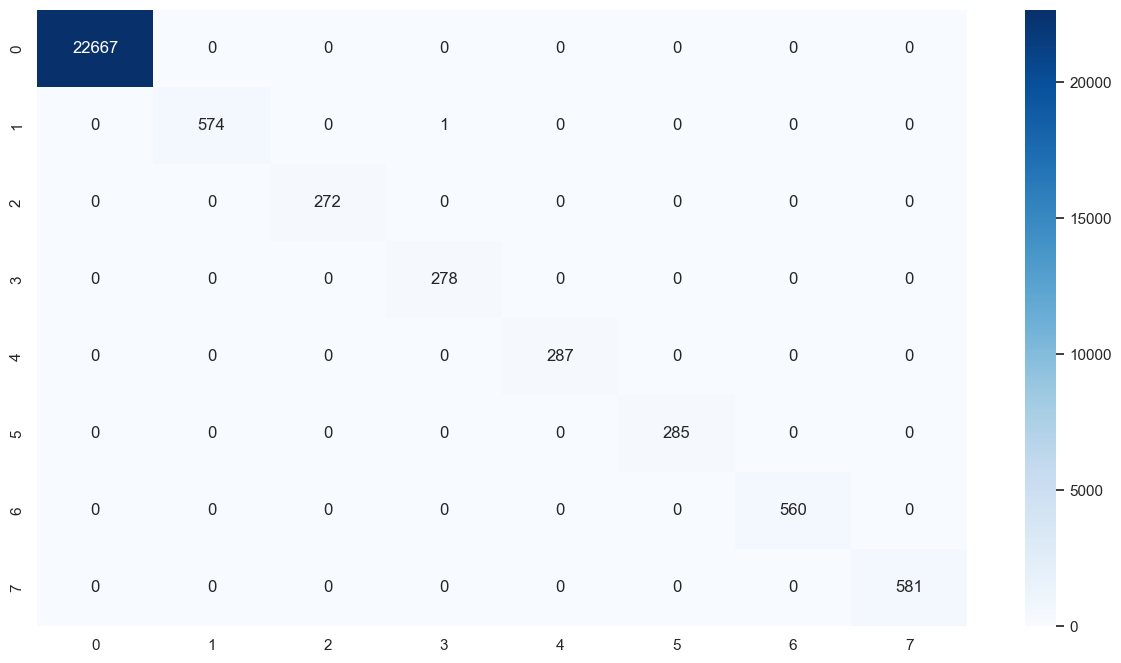

In [24]:
# We print our results
sns.set(rc={'figure.figsize':(15,8)})
predictions = clf.predict(X_test)
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions)
clf_report = classification_report(true_labels, predictions, digits=5)
heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 

# The heatmap is cool but this is the most important result
print(clf_report)

C:\Users\97252\anaconda3\lib\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[(0, 105753), (1, 2682), (2, 1272), (3, 1300), (4, 1339), (5, 1327), (6, 2613), (7, 2709)]
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000     22667
           1    1.00000   0.99826   0.99913       575
           2    1.00000   1.00000   1.00000       272
           3    0.99642   1.00000   0.99820       278
           4    1.00000   1.00000   1.00000       287
           5    1.00000   1.00000   1.00000       285
           6    1.00000   1.00000   1.00000       560
           7    1.00000   1.00000   1.00000       581

    accuracy                        0.99996     25505
   macro avg    0.99955   0.99978   0.99967     25505
weighted avg    0.99996   0.99996   0.99996     25505



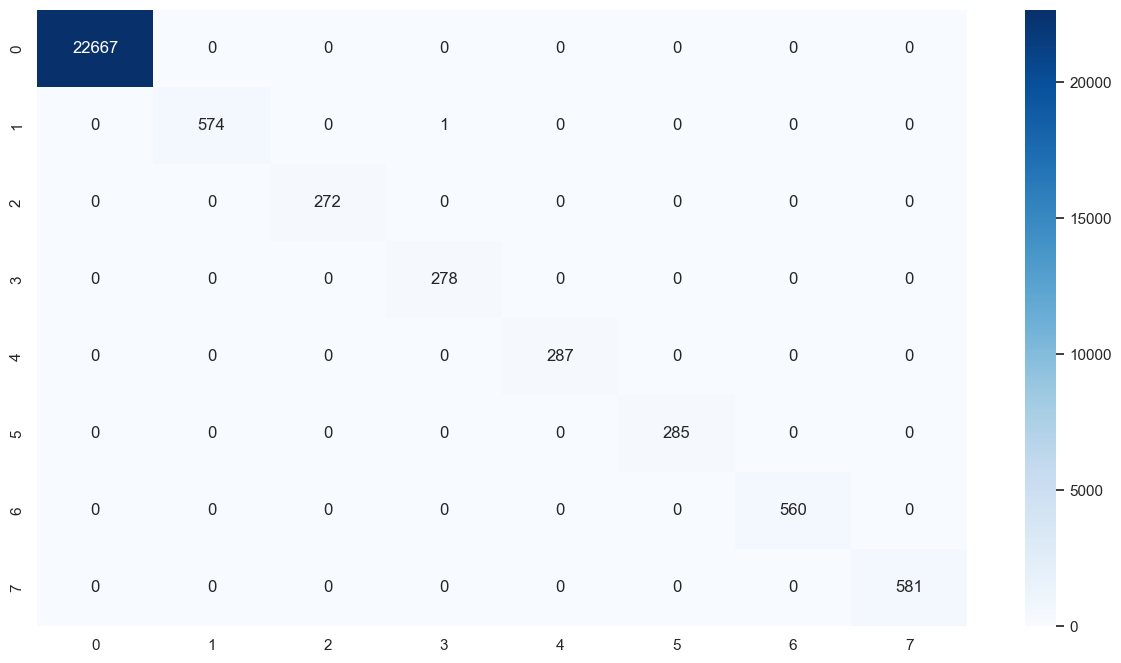

In [25]:
import xgboost as xgb
# We choose our model of choice and set it's hyper parameters you can change anything
xg = xgb.XGBClassifier(objective="binary:logistic", random_state=45)
xg.fit(X_train, y_train)

# Check data balance and variety
print(sorted(Counter(y_train).items()))
ResultPrintout(xg)

RandomForestClassifier(n_estimators=150)
              precision    recall  f1-score   support

           0    0.99996   1.00000   0.99998     22667
           1    1.00000   0.99826   0.99913       575
           2    1.00000   1.00000   1.00000       272
           3    0.99640   0.99640   0.99640       278
           4    1.00000   1.00000   1.00000       287
           5    1.00000   1.00000   1.00000       285
           6    1.00000   1.00000   1.00000       560
           7    1.00000   1.00000   1.00000       581

    accuracy                        0.99992     25505
   macro avg    0.99954   0.99933   0.99944     25505
weighted avg    0.99992   0.99992   0.99992     25505

HistGradientBoostingClassifier()
              precision    recall  f1-score   support

           0    0.99982   1.00000   0.99991     22667
           1    1.00000   0.99826   0.99913       575
           2    0.99265   0.99265   0.99265       272
           3    0.97473   0.97122   0.97297       278
    

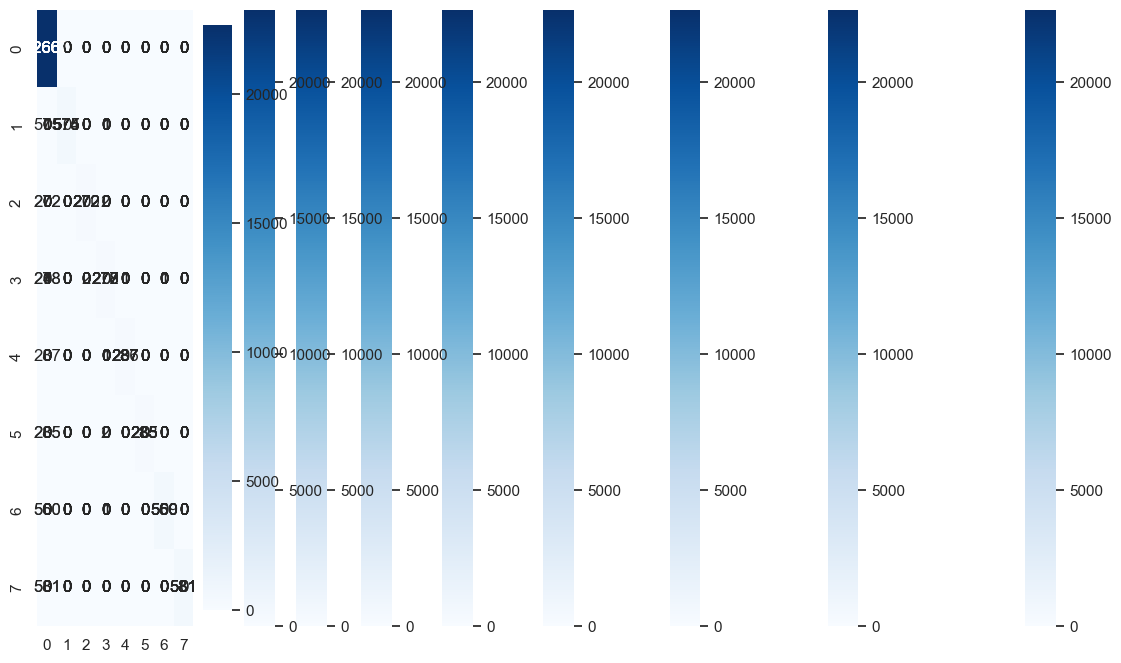

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import timeit
import xgboost 
import sklearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

Logistic_Regression =  LogisticRegression()

Decision_Tree =DecisionTreeClassifier(random_state=42, class_weight='balanced')

Random_Forest =  RandomForestClassifier(random_state=42, class_weight='balanced')

Extra_Trees=  ExtraTreesClassifier(random_state=42, class_weight='balanced')

Gradient_Boosting =  GradientBoostingClassifier(random_state=42)

Hist_Gradient_Boosting =  HistGradientBoostingClassifier()

AdaBoost = AdaBoostClassifier(random_state=42)

clf=RandomForestClassifier(n_estimators= 150)

# SVC =SVC(class_weight='balanced', random_state=42)


xgb=xgboost.sklearn.XGBClassifier(max_depth=2)
models={clf,xgb,Logistic_Regression,Decision_Tree,Random_Forest,Extra_Trees,Gradient_Boosting,Hist_Gradient_Boosting,AdaBoost}

for model in models:   
    # Train Model
    model.fit(X_train, y_train)
    print(model)
    # # Check data balance and variety
    ResultPrintout(model)


# Test

In [27]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import accuracy_score
best=0
m=None

models={xg,clf,xgb,Gradient_Boosting,Logistic_Regression,Decision_Tree,Random_Forest,Extra_Trees,Gradient_Boosting,Hist_Gradient_Boosting,AdaBoost}
for i in models:
    print(i)
    sns.set(rc={'figure.figsize':(15,8)})
    predictions = i.predict(X_test)
    true_labels = y_test
    print(accuracy_score(true_labels, predictions)*100)
    if accuracy_score(true_labels, predictions)*100 > best:
        best=accuracy_score(true_labels, predictions)*100
        m=i
#         print(best)
#         print(m)
        
print("-------")
print(best)
print(m)

RandomForestClassifier(n_estimators=150)
99.99215840031367
HistGradientBoostingClassifier()
99.94118800235248
LogisticRegression()
88.8727700450892
RandomForestClassifier(class_weight='balanced', random_state=42)
99.976475200941
AdaBoostClassifier(random_state=42)
92.24857871005685
DecisionTreeClassifier(class_weight='balanced', random_state=42)
99.99607920015683
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=45, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
99.996

In [28]:
with open(f'./dataset_{str(dataset_number)}_val.json') as file:
    raw_ds = json.load(file)
test_df = pd.json_normalize(raw_ds, max_level=2)
# Preprocess the validation dataset, remember that here you don't have the labels
for column in test_df.columns[test_df.isna().any()].tolist():
    #df.drop(column, axis=1, inplace=True)
    test_df[column] = test_df[column].fillna('None')
change_url(test_df)
test_df = vectorize_df(test_df)

# Predict with your model
X = test_df[features_list].to_numpy()
print(m)
predictions = m.predict(X)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


# Save my predictions

In [29]:
# Save your preditions
enc = LabelEncoder()
np.savetxt(f'./dataset_{str(dataset_number)}_{test_type}_result.txt', enc.fit_transform(predictions), fmt='%2d')